In [3]:
url =  'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/10%EC%A3%BC%EC%B0%A8/data.csv'

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# 1. 데이터 읽기
# 2. Species 의 종류는 몇가지 인지?

In [8]:
df = pd.read_csv(url)
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,A,242.0,25.4,30.0,11.5200,4.0200
1,A,290.0,26.3,31.2,12.4800,4.3056
2,A,340.0,26.5,31.1,12.3778,4.6961
3,A,363.0,29.0,33.5,12.7300,4.4555
4,A,430.0,29.0,34.0,12.4440,5.1340


In [10]:
df['Species'].value_counts()

E    56
A    35
B    20
F    17
G    14
D    11
C     6
Name: Species, dtype: int64

<Axes: xlabel='Species', ylabel='count'>

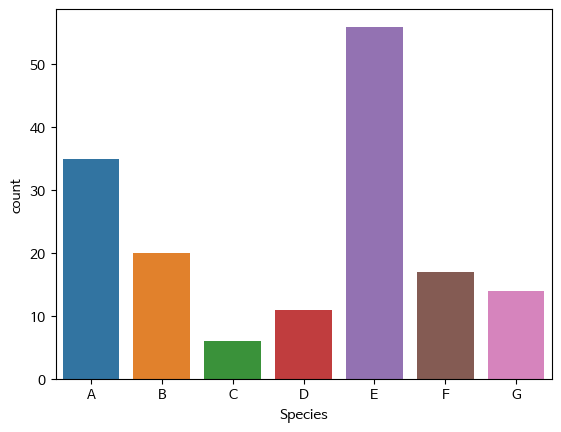

In [11]:
sns.countplot(data=df,x='Species')

In [12]:
# 학습데이터, 정답을 분류

In [13]:
X = df.iloc[:,1:].to_numpy()
y = df['Species'].to_numpy()

In [14]:
X[:3]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961]])

In [15]:
y[:3]

array(['A', 'A', 'A'], dtype=object)

In [16]:
# 학습용,테스트용 데이터 분리
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [17]:
# StandardSacler를 이용한 표준화
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [20]:
# 분류 알고리즘 : k 최근접 이웃 알고리즘
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=3)
knc.fit(x_train_scaled,y_train)

# 평가 : 성능, 과적합
knc.score(x_train_scaled,y_train), knc.score(x_test_scaled, y_test)

(0.8823529411764706, 0.85)

In [21]:
# 예측( 테스트데이터)
x_test_scaled[:5]

array([[-0.88741352, -0.91804565, -1.03098914, -0.90464451, -0.80762518],
       [-1.06924656, -1.50842035, -1.54345461, -1.58849582, -1.93803151],
       [-0.54401367,  0.35641402,  0.30663259, -0.8135697 , -0.65388895],
       [-0.34698097, -0.23396068, -0.22320459, -0.11905019, -0.12233464],
       [-0.68475132, -0.51509149, -0.58801052, -0.8998784 , -0.50124996]])

In [24]:
# 예측결과를 바로 알려줌
knc.predict(x_test_scaled[-5:]) , y_test[-5:]

(array(['E', 'B', 'E', 'D', 'E'], dtype=object),
 array(['E', 'B', 'B', 'D', 'E'], dtype=object))

In [27]:
# 예측을 확률로 표현
knc.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [28]:
knc.predict_proba(x_test_scaled[-5:])

array([[0.        , 0.33333333, 0.        , 0.        , 0.66666667,
        0.        , 0.        ],
       [0.        , 0.66666667, 0.        , 0.        , 0.33333333,
        0.        , 0.        ],
       [0.        , 0.33333333, 0.        , 0.        , 0.66666667,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        ]])

로지스틱 회귀
  - 분류문제에 사용되는 통계적 기법
  - 이진분류, 다중분류
  - 선형회귀의 값을 로지스틱함수(시그모이드함수) 를 통과한 값
  - z = b0 + b1*x1 + b2*x2 ....
  - b0,b1 가중치 ,x1,x2는 입력변수
  - 0과 1사이의 확률 값으로 변환, 특정 임계값을 기준으로 클래스를 분류

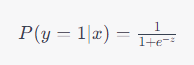

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


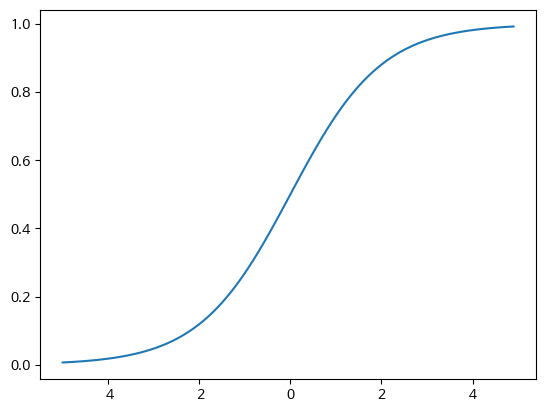

In [30]:
z = np.arange(-5,5,0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.show()

로지스틱 회귀(이진분류)
  - B, F

In [41]:
two_indexs = (y == 'B') | (y == 'F')
B_F_X = X[two_indexs]
B_F_y = y[two_indexs]

In [42]:
x_train,x_test,y_train,y_test = train_test_split(B_F_X,B_F_y,random_state=42)
ss = StandardScaler()
ss.fit(x_train)
x_train_sacled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [43]:
from sklearn.linear_model import LogisticRegression  # 분류

In [44]:
lr = LogisticRegression()
lr.fit(x_train_sacled,y_train)

LogisticRegression()

In [46]:
lr.score(x_train_sacled,y_train) , lr.score(x_test_scaled,y_test)

(1.0, 1.0)

In [47]:
lr.predict(x_test_scaled[:5]),  y_test[:5]

(array(['B', 'B', 'B', 'F', 'F'], dtype=object),
 array(['B', 'B', 'B', 'F', 'F'], dtype=object))

In [48]:
# 확률값
lr.predict_proba(x_test_scaled[:5])

array([[0.89902954, 0.10097046],
       [0.90163949, 0.09836051],
       [0.93007224, 0.06992776],
       [0.05563118, 0.94436882],
       [0.00219424, 0.99780576]])

In [49]:
lr.classes_

array(['B', 'F'], dtype=object)

In [51]:
df.columns[1:]

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [52]:
# z = b0*'Weight', b1*'Length', b2*'Diagonal', b3*'Height', b4*'Width' + bias

In [53]:
lr.coef_, lr.intercept_

(array([[ 0.51463797,  1.41675741,  1.39308138, -0.78687366,  0.25839289]]),
 array([0.05576825]))

In [55]:
# 로지스틱 결정함수 양성클래스에 대한 예측점수
# B F
# 0,1
decision = lr.decision_function(x_test_scaled[:5])
decision

array([-2.18648786, -2.21557532, -2.58779951,  2.83177298,  6.11972514])

In [56]:
# 로지스틱함수(시그모이드함수 적용) -- 확률  (0 ~ 1)
# 양성클래스일 확률
from scipy.special import expit
expit(decision)

array([0.10097046, 0.09836051, 0.06992776, 0.94436882, 0.99780576])

로지스틱 회귀(다중분류)

In [84]:
# 규제강도와 최대 반복횟수
lr = LogisticRegression(C=20, max_iter=1000)

In [85]:
df = pd.read_csv(url)
X = df.iloc[:,1:].to_numpy()
y = df['Species'].to_numpy()

In [86]:
# 분할
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [87]:
# 표준화
ss = StandardScaler()
ss.fit(x_train)
x_train_scaled = ss.transform(x_train)
x_test_scaled = ss.transform(x_test)

In [88]:
# 모델적용
lr.fit(x_train_scaled,y_train)

LogisticRegression(C=20, max_iter=1000)

In [89]:
# 평가
lr.score(x_train_scaled,y_train), lr.score(x_test_scaled,y_test)

(0.9327731092436975, 0.925)

In [90]:
# 예측
lr.predict(x_test_scaled[:5])

array(['E', 'G', 'F', 'B', 'E'], dtype=object)

In [91]:
lr.classes_

array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object)

In [92]:
decision = lr.decision_function(x_test_scaled[:5])
decision

array([[ -6.4981075 ,   3.33887406,  -0.63447906,   1.03222976,
          5.16362741,  -2.72866624,   0.32652158],
       [-10.8594787 ,   2.97809206,  -4.25966706,   1.92718268,
          4.77100483,  -2.39848068,   7.84134687],
       [ -4.33529002,   2.35757961,  -3.87154737,  -6.233078  ,
          3.17445742,   6.48671188,   2.42116649],
       [ -0.68336376,   3.26454113,   1.25851985,   0.45272689,
          2.6470026 ,  -1.1866731 ,  -5.7527536 ],
       [ -6.39707374,   3.50282892,  -0.70679131,  -1.99274278,
          5.81574167,  -0.11034273,  -0.11162003]])

In [93]:
from scipy.special import softmax
np.round(softmax(decision),2)

array([[0.  , 0.01, 0.  , 0.  , 0.04, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.63],
       [0.  , 0.  , 0.  , 0.  , 0.01, 0.16, 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.  , 0.  , 0.08, 0.  , 0.  ]])

In [94]:
np.round(lr.predict_proba(x_test_scaled[:5]),2)

array([[0.  , 0.14, 0.  , 0.01, 0.84, 0.  , 0.01],
       [0.  , 0.01, 0.  , 0.  , 0.04, 0.  , 0.95],
       [0.  , 0.02, 0.  , 0.  , 0.03, 0.93, 0.02],
       [0.01, 0.57, 0.08, 0.03, 0.31, 0.01, 0.  ],
       [0.  , 0.09, 0.  , 0.  , 0.9 , 0.  , 0.  ]])

실습용 데이터로 분류 모델 만들기